In [325]:
import os
import mlrose_hiive as mlr
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import pickle as pk

import utils as ut

# set random seed for test reproducibility
np.random.seed(42)

# suppress sklearn convergence warning
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [660]:
# problem control ('four' and 'color')
prob_type = 'four'  
load_previous = True

In [661]:
if load_previous:
    if prob_type == 'four':
        prob_load = 'FourPeaks'
    elif prob_type == 'color':
        prob_load = 'ColorsMap'

    # Define the path to the pickle file
    pickle_file_path1 = './outputdir/'+ prob_load +'/'+ prob_load +'_GA_stats.pickle'
    pickle_file_path2 = './outputdir/'+ prob_load +'/'+ prob_load +'_RHC_stats.pickle'
    pickle_file_path3 = './outputdir/'+ prob_load +'/'+ prob_load +'_SA_stats.pickle'
    pickle_file_path4 = './outputdir/'+ prob_load +'/'+ prob_load +'_GA_curves.pickle'
    pickle_file_path5 = './outputdir/'+ prob_load +'/'+ prob_load +'_RHC_curves.pickle'
    pickle_file_path6 = './outputdir/'+ prob_load +'/'+ prob_load +'_SA_curves.pickle'

    print(pickle_file_path2)
    # Open the pickle file in read-binary mode and load the object
    with open(pickle_file_path1, 'rb') as file:
        df_results_ga = pk.load(file)

    # Open the pickle file in read-binary mode and load the object
    with open(pickle_file_path2, 'rb') as file:
        df_results_rhc = pk.load(file)

    # Open the pickle file in read-binary mode and load the object
    with open(pickle_file_path3, 'rb') as file:
        df_results_sa = pk.load(file)

    # Open the pickle file in read-binary mode and load the object
    with open(pickle_file_path4, 'rb') as file:
        df_curve_ga = pk.load(file)

    # Open the pickle file in read-binary mode and load the object
    with open(pickle_file_path5, 'rb') as file:
        df_curve_rhc = pk.load(file)

    # Open the pickle file in read-binary mode and load the object
    with open(pickle_file_path6, 'rb') as file:
        df_curve_sa = pk.load(file)


./outputdir/FourPeaks/FourPeaks_RHC_stats.pickle


In [367]:
if not load_previous:
	if prob_type == 'color':
		experiment_name = "ColorsMap_RHC"
	elif prob_type == 'four':
		experiment_name = "FourPeaks_RHC"
	directory_root = './outputdir'

	# prep dataset
	labels = ['problem', 'count', 'seed', 'prob_size', 'max_attempts', 'max_iters', 'restarts', 'run_time', 'best_fitness', 'stopped_at']
	results_list = []
	curve_list = []
	curve_dfs = []

	np.random.seed(100)
	seeds = np.random.randint(0, 1000, size=(10))
	n_size = [20, 40, 60, 80, 100]
	attempt_size = [25, 50, 75]
	restart_size = [0, 25, 50, 100]
	iters = 50000 # np.inf
	count = 0
	total = len(seeds) * len(n_size) * len(attempt_size) * len(restart_size) 

	# run RHC over varying options
	for n in n_size:
		if prob_type == 'color':
			problem = ut.MaxKColorGenerator().generate(number_of_nodes=n, max_connections_per_node=6, max_colors=5, maximize=True)
		elif prob_type == 'four':
			problem = ut.FourPeaksGenerator().generate(size=n, t_pct=0.1)
			# Four Peaks Problem: with length of 40, there are two local maxima of 40, and two optima of 75
			# fitness = mlr.FourPeaks(t_pct=0.1)
			# problem = mlr.DiscreteOpt(length=n, fitness_fn=fitness, maximize=True, max_val=2)

		for seed in seeds:
			for attempts in attempt_size:
				for restart in restart_size:
					count += 1
					if count % 10 == 0:
						print(count,'/',total)
						
					start_time = time.time()
					best_state, best_fitness, curve = mlr.random_hill_climb(problem, max_attempts=attempts, max_iters=iters, restarts=restart, curve=True)
					run_time = time.time() - start_time
					stopped_at = curve.shape[0]
					results_list.append((experiment_name, count, seed, n, attempts, iters, restart, run_time, best_fitness, stopped_at))
					df_curve = pd.DataFrame(curve, columns=['fitness','fevals'])
					df_curve['iterations'] = np.arange(1, len(curve)+1)
					df_curve['fevals_total'] = df_curve['fevals'].cumsum()
					df_curve[['count', 'seed', 'prob_size', 'max_attempts', 'max_iters', 'restarts', 'run_time', 'best_fitness', 'stopped_at']] = count, seed, n, attempts, iters, restart, run_time, best_fitness, stopped_at
					curve_dfs.append(df_curve)
					curve_list.append(curve)
					problem.reset()  

	# # compile & save results
	df_results_rhc = pd.DataFrame(results_list, columns=labels)
	df_curve_rhc = pd.concat(curve_dfs)
	ut.data_store([df_results_rhc, df_curve_rhc], experiment_name, directory_root)

	# minimal output
	print("# Best Run:")
	df_max = df_results_rhc[(df_results_rhc['best_fitness'] == df_results_rhc['best_fitness'].max())]
	idx = df_max['stopped_at'].idxmin()
	print(df_results_rhc.loc[idx])

10 / 600
20 / 600
30 / 600
40 / 600
50 / 600
60 / 600
70 / 600
80 / 600
90 / 600
100 / 600
110 / 600
120 / 600
130 / 600
140 / 600
150 / 600
160 / 600
170 / 600
180 / 600
190 / 600
200 / 600
210 / 600
220 / 600
230 / 600
240 / 600
250 / 600
260 / 600
270 / 600
280 / 600
290 / 600
300 / 600
310 / 600
320 / 600
330 / 600
340 / 600
350 / 600
360 / 600
370 / 600
380 / 600
390 / 600
400 / 600
410 / 600
420 / 600
430 / 600
440 / 600
450 / 600
460 / 600
470 / 600
480 / 600
490 / 600
500 / 600
510 / 600
520 / 600
530 / 600
540 / 600
550 / 600
560 / 600
570 / 600
580 / 600
590 / 600
600 / 600
Saved files in ./outputdir\FourPeaks
# Best Run:
problem         FourPeaks_RHC
count                     504
seed                      792
prob_size                 100
max_attempts               75
max_iters               50000
restarts                  100
run_time             0.233467
best_fitness            115.0
stopped_at                192
Name: 503, dtype: object


Text(0, 0.5, 'Fitness')

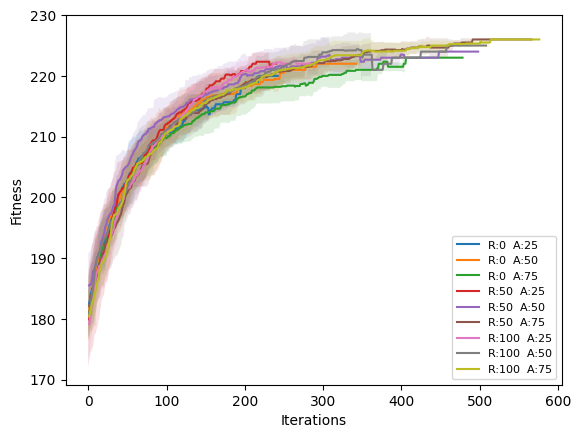

In [439]:
# average fitness performance for varying hyperparameters (multiple seeds)
attempt_size = [25, 50, 75] # 25 50, 75
restart_size = [0, 50, 100] # 0, 25, 50, 100
for r in restart_size:
    for a in attempt_size:
        df_group = df_curve_rhc[(df_curve_rhc['restarts'] == r)  & (df_curve_rhc['max_attempts'] == a) & (df_curve_rhc['prob_size'] == 60)] 
        fit_mean = df_group.groupby('iterations').mean()['fitness']
        fit_std = df_group.groupby('iterations').std()['fitness']
        plt.plot(fit_mean, label='R:'+ str(r) +'  A:'+str(a))
        plt.fill_between(np.arange(len(fit_mean)), fit_mean - fit_std, fit_mean + fit_std, alpha=0.15)
plt.legend(fontsize=8)
plt.xlabel('Iterations')
plt.ylabel('Fitness')
# plt.ylim(bottom=180)

(0.0, 29262.53473124274)

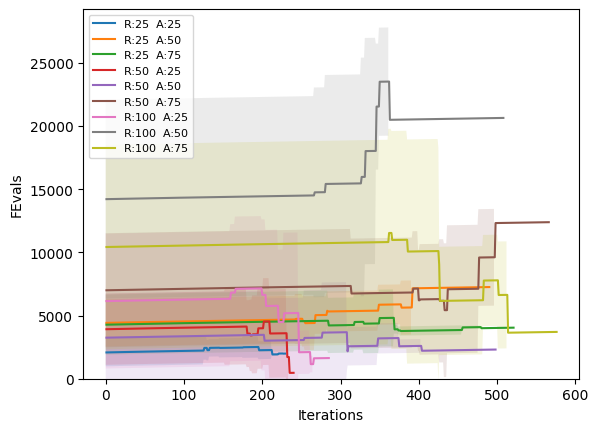

In [405]:
# average fitness performance for varying hyperparameters (multiple seeds)
attempt_size = [25, 50, 75]
restart_size = [25, 50, 100] # 0, 25, 50, 100
for r in restart_size:
    for a in attempt_size:
        df_group = df_curve_rhc[(df_curve_rhc['restarts'] == r) & (df_curve_rhc['max_attempts'] == a) & (df_curve_rhc['prob_size'] == 60)] 
        fit_mean = df_group.groupby('iterations').mean()['fevals']
        fit_std = df_group.groupby('iterations').std()['fevals']
        plt.plot(fit_mean, label='R:'+ str(r) +'  A:'+str(a))
        plt.fill_between(np.arange(len(fit_mean)), fit_mean - fit_std, fit_mean + fit_std, alpha=0.15)
plt.legend(fontsize=8)
plt.xlabel('Iterations')
plt.ylabel('FEvals')
plt.ylim(bottom=0)

20 Itermean: 131.09166666666667 Iterstd: 54.25142023230564
40 Itermean: 195.975 Iterstd: 67.21823444324217
60 Itermean: 297.6166666666667 Iterstd: 113.17539362521441
80 Itermean: 342.6 Iterstd: 130.98723856416956
100 Itermean: 409.03333333333336 Iterstd: 154.61036690841775


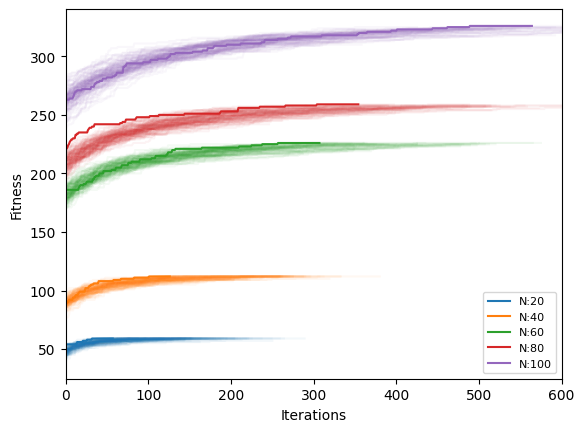

In [407]:
# problem size (with best) versus number of iterations
prob_size = [20, 40, 60, 80, 100]
idxs = []
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
for ii , i in enumerate(prob_size):
    df_sub = df_curve_rhc[(df_curve_rhc['prob_size'] == i)]
    vals = df_sub['count'].unique()

    average_iter = []
    for jj, j in enumerate(vals):
        df_i = df_sub[(df_sub['prob_size'] == i) & (df_sub['count']==j)]
        vals_j = df_i['fitness'].values
        average_iter.append(len(vals_j))
        plt.plot(vals_j, color=colors[ii], alpha=0.05)
    print(i, 'Itermean:',np.array(average_iter).mean(), 'Iterstd:',np.array(average_iter).std())

for kk, i in enumerate(prob_size):
    df_subs = df_results_rhc[(df_results_rhc['prob_size'] == i)]
    df_max = df_subs[(df_subs['best_fitness'] == df_subs['best_fitness'].max())]
    idx = df_max['stopped_at'].idxmin()
    vals_i = df_curve_rhc[df_curve_rhc['count'] == df_max.loc[idx]['count']]['fitness'].values
    plt.plot(vals_i, color=colors[kk], label='N:'+str(i))

plt.legend(fontsize=8)
plt.xlabel('Iterations')
plt.ylabel('Fitness')

if prob_type == 'four':
    plt.xlim([0, 500])
if prob_type == 'color':
    plt.xlim([0, 600])


20 Fmax: 37.0 Fmean: 32.84166666666667 Fstd: 8.953580134349735
20 Emax: 4271.0 Emean: 628.6583333333333 Estd: 691.1503634742265
20 Tmean 0.13481168945630392 Tstd: 0.13586574040683594
40 Fmax: 75.0 Fmean: 46.225 Fstd: 24.390046637921788
40 Emax: 20903.0 Emean: 3157.4666666666667 Estd: 4314.460333060852
40 Tmean 0.1284711261590322 Tstd: 0.16706171360985586
60 Fmax: 87.0 Fmean: 28.941666666666666 Fstd: 26.73926446050618
60 Emax: 14819.0 Emean: 2173.383333333333 Estd: 2940.948946013099
60 Tmean 0.07321566541989645 Tstd: 0.08852873637516032
80 Fmax: 98.0 Fmean: 17.933333333333334 Fstd: 20.518176223913166
80 Emax: 11317.0 Emean: 1935.1 Estd: 2511.106268161505
80 Tmean 0.072375883658727 Tstd: 0.08034883771119254
100 Fmax: 115.0 Fmean: 13.083333333333334 Fstd: 14.78263808962693
100 Emax: 10832.0 Emean: 1718.525 Estd: 2387.9025941974687
100 Tmean 0.05432108243306478 Tstd: 0.05861268661583416


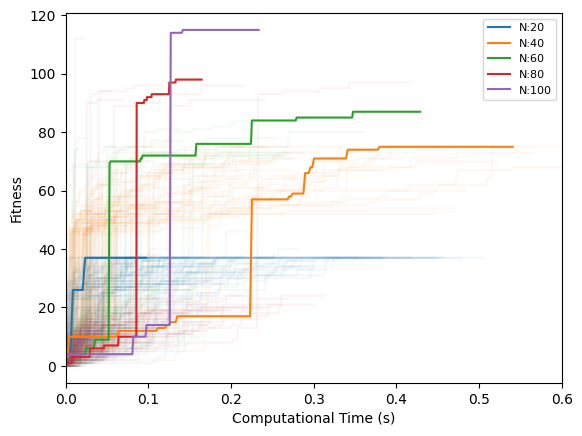

In [662]:
# problem size (with best) versus computational time
prob_size = [20, 40, 60, 80, 100]
idxs = []
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
for ii , i in enumerate(prob_size):
    df_sub = df_curve_rhc[(df_curve_rhc['prob_size'] == i)]
    vals = df_sub['count'].unique()

    average_times = []
    average_fitness = []
    average_fevals = []
    for jj, j in enumerate(vals):
        df_i = df_sub[(df_sub['prob_size'] == i) & (df_sub['count']==j)]
        time_j = df_i['run_time'].max()
        average_times.append(time_j)
        vals_j = df_i['fitness'].values
        fevals_j = df_i['fevals'].values
        average_fitness.append(vals_j.max())
        average_fevals.append(fevals_j.max())
        time_inc_j = np.linspace(0, time_j, len(vals_j))
        plt.plot(time_inc_j, vals_j, color=colors[ii], alpha=0.05)
    print(i,'Fmax:', np.array(average_fitness).max(), 'Fmean:', np.array(average_fitness).mean(), 'Fstd:',np.array(average_fitness).std())
    print(i,'Emax:', np.array(average_fevals).max(), 'Emean:', np.array(average_fevals).mean(), 'Estd:',np.array(average_fevals).std())
    print(i, 'Tmean', np.array(average_times).mean(),'Tstd:', np.array(average_times).std())

for kk, i in enumerate(prob_size):
    df_subs = df_results_rhc[(df_results_rhc['prob_size'] == i)]
    df_max = df_subs[(df_subs['best_fitness'] == df_subs['best_fitness'].max())]
    idx = df_max['stopped_at'].idxmin()
    time_i = df_max.loc[idx]['run_time']
    vals_i = df_curve_rhc[df_curve_rhc['count'] == df_max.loc[idx]['count']]['fitness'].values
    time_inc_i = np.linspace(0, time_i, len(vals_i))
    plt.plot(time_inc_i, vals_i, color=colors[kk], label='N:'+str(i))

plt.legend(fontsize=8)
plt.xlabel('Computational Time (s)')
plt.ylabel('Fitness')
if prob_type == 'four':
    plt.xlim([0, 0.6])
if prob_type == 'color':
    plt.xlim([0, 6])

20 Fmax: 59.0 Fmean: 58.53333333333333 Fstd: 1.0482790129010926
20 Emax: 3355.0 Emean: 602.6083333333333 Estd: 611.7579490810797
20 Tmean 0.04432631532351176 Tstd: 0.045296536521856084
40 Fmax: 112.0 Fmean: 111.03333333333333 Fstd: 1.586050300449376
40 Emax: 9847.0 Emean: 1618.3166666666666 Estd: 1818.9337993420456
40 Tmean 0.2788094719250997 Tstd: 0.35336985222171774
60 Fmax: 226.0 Fmean: 222.20833333333334 Fstd: 3.461444383811796
60 Emax: 26555.0 Emean: 4971.508333333333 Estd: 5761.146130177909
60 Tmean 2.0915037274360655 Tstd: 2.0103755895119058
80 Fmax: 259.0 Fmean: 253.79166666666666 Fstd: 5.576581738743627
80 Emax: 40389.0 Emean: 5753.858333333334 Estd: 6622.702250964522
80 Tmean 2.5663714448610944 Tstd: 2.404206136467694
100 Fmax: 326.0 Fmean: 318.68333333333334 Fstd: 6.234291370227163
100 Emax: 44583.0 Emean: 7198.2 Estd: 8208.498127550496
100 Tmean 3.7257590889930725 Tstd: 3.4820994059641017


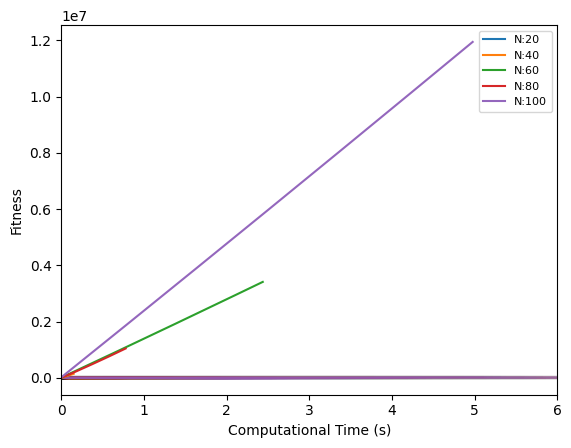

In [649]:
# problem size (with best) versus fevals time
prob_size = [20, 40, 60, 80, 100]
idxs = []
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
for ii , i in enumerate(prob_size):
    df_sub = df_curve_rhc[(df_curve_rhc['prob_size'] == i)]
    vals = df_sub['count'].unique()

    average_times = []
    average_fitness = []
    average_fevals = []
    for jj, j in enumerate(vals):
        df_i = df_sub[(df_sub['prob_size'] == i) & (df_sub['count']==j)]
        time_j = df_i['run_time'].max()
        average_times.append(time_j)
        vals_j = df_i['fitness'].values
        fevals_j = df_i['fevals'].values
        average_fitness.append(vals_j.max())
        average_fevals.append(fevals_j.max())
        time_inc_j = np.linspace(0, time_j, len(vals_j))
        plt.plot(time_inc_j, fevals_j, color=colors[ii], alpha=0.05)
    print(i,'Fmax:', np.array(average_fitness).max(), 'Fmean:', np.array(average_fitness).mean(), 'Fstd:',np.array(average_fitness).std())
    print(i,'Emax:', np.array(average_fevals).max(), 'Emean:', np.array(average_fevals).mean(), 'Estd:',np.array(average_fevals).std())
    print(i, 'Tmean', np.array(average_times).mean(),'Tstd:', np.array(average_times).std())

for kk, i in enumerate(prob_size):
    df_subs = df_results_rhc[(df_results_rhc['prob_size'] == i)]
    df_max = df_subs[(df_subs['best_fitness'] == df_subs['best_fitness'].max())]
    idx = df_max['stopped_at'].idxmin()
    time_i = df_max.loc[idx]['run_time']
    vals_i = df_curve_rhc[df_curve_rhc['count'] == df_max.loc[idx]['count']]['fitness'].values
    fevals_i = df_curve_rhc[df_curve_rhc['count'] == df_max.loc[idx]['count']]['fevals_total'].values
    time_inc_i = np.linspace(0, time_i, len(vals_i))
    plt.plot(time_inc_i, fevals_i, color=colors[kk], label='N:'+str(i))

plt.legend(fontsize=8)
plt.xlabel('Computational Time (s)')
plt.ylabel('Fitness')
if prob_type == 'four':
    plt.xlim([0, 0.6])
if prob_type == 'color':
    plt.xlim([0, 6])

In [213]:
if not load_previous:
	if prob_type == 'color':
		experiment_name = "ColorsMap_GA"
	elif prob_type == 'four':
		experiment_name = "FourPeaks_GA"
	directory_root = './outputdir'
	print(prob_type, experiment_name)

	# prep dataset
	labels = ['problem', 'count', 'seed', 'prob_size', 'max_attempts', 'max_iters', 'pop_size', 'mutation_prob', 'run_time', 'best_fitness', 'stopped_at']
	results_list = []
	curve_list = []
	curve_dfs = []

	np.random.seed(100)
	seeds = np.random.randint(0, 1000, size=(10))
	n_size = [20, 40, 60, 80, 100]
	attempt_size = [0] #, 25, 50, 75]
	pop_sizes = [25, 50, 100]
	mut_size = [0.2, 0.5, 0.8]
	iters = 50000 # np.inf
	count = 0
	total = len(seeds) * len(n_size) * len(attempt_size) * len(pop_sizes) * len(mut_size) 

	# run GA over varying options
	for n in n_size:

		if prob_type == 'color':
			problem = ut.MaxKColorGenerator().generate(number_of_nodes=n, max_connections_per_node=6, max_colors=5, maximize=True)
		elif prob_type == 'four':
			problem = ut.FourPeaksGenerator().generate(size=n, t_pct=0.1)
			# fitness = mlr.FourPeaks(t_pct=0.1)
			# problem = mlr.DiscreteOpt(length=n, fitness_fn=fitness, maximize=True, max_val=2)

		for seed in seeds:
			for attempts in attempt_size:
				for pop_size in pop_sizes:
					for mutation_prob in mut_size:
						count += 1
						if count % 10 == 0:
							print(count,'/',total)

						start_time = time.perf_counter()
						best_state, best_fitness, curve = mlr.genetic_alg(problem, pop_size = pop_size, mutation_prob = mutation_prob, max_attempts=attempts, max_iters=iters, curve=True)
						run_time = time.perf_counter() - start_time
					
						stopped_at = curve.shape[0]
						results_list.append((experiment_name, count, seed, n, attempts, iters, pop_size, mutation_prob, run_time, best_fitness, stopped_at))
						df_curve = pd.DataFrame(curve, columns=['fitness','fevals'])
						df_curve['iterations'] = np.arange(1, len(curve)+1)
						df_curve['fevals_total'] = df_curve['fevals'].cumsum()
						df_curve[['count', 'seed', 'prob_size', 'max_attempts', 'max_iters', 'pop_size', 'mutation_prob', 'run_time', 'best_fitness', 'stopped_at']] = count, seed, n, attempts, iters, pop_size, mutation_prob, run_time, best_fitness, stopped_at
						curve_dfs.append(df_curve)
						curve_list.append(curve)
						problem.reset() 


	# compile & save results
	df_results_ga = pd.DataFrame(results_list, columns=labels)
	df_curve_ga = pd.concat(curve_dfs)
	ut.data_store([df_results_ga, df_curve_ga], experiment_name, directory_root)

	# minimal output
	print("# Best Run:")
	df_max = df_results_ga[(df_results_ga['best_fitness'] == df_results_ga['best_fitness'].max())]
	idx = df_max['stopped_at'].idxmin()
	print(df_results_ga.loc[idx])

color ColorsMap_GA
10 / 1350
20 / 1350
30 / 1350
40 / 1350
50 / 1350
60 / 1350
70 / 1350
80 / 1350
90 / 1350
100 / 1350
110 / 1350
120 / 1350
130 / 1350
140 / 1350
150 / 1350
160 / 1350
170 / 1350
180 / 1350
190 / 1350
200 / 1350
210 / 1350
220 / 1350
230 / 1350
240 / 1350
250 / 1350
260 / 1350
270 / 1350
280 / 1350
290 / 1350
300 / 1350
310 / 1350
320 / 1350
330 / 1350
340 / 1350
350 / 1350
360 / 1350
370 / 1350
380 / 1350
390 / 1350
400 / 1350
410 / 1350
420 / 1350
430 / 1350
440 / 1350
450 / 1350
460 / 1350
470 / 1350
480 / 1350
490 / 1350
500 / 1350
510 / 1350
520 / 1350
530 / 1350
540 / 1350
550 / 1350
560 / 1350
570 / 1350
580 / 1350
590 / 1350
600 / 1350
610 / 1350
620 / 1350
630 / 1350
640 / 1350
650 / 1350
660 / 1350
670 / 1350
680 / 1350
690 / 1350
700 / 1350
710 / 1350
720 / 1350
730 / 1350
740 / 1350
750 / 1350
760 / 1350
770 / 1350
780 / 1350
790 / 1350
800 / 1350
810 / 1350
820 / 1350
830 / 1350
840 / 1350
850 / 1350
860 / 1350
870 / 1350
880 / 1350
890 / 1350
900 / 1350


(175.0, 203.33276379259343)

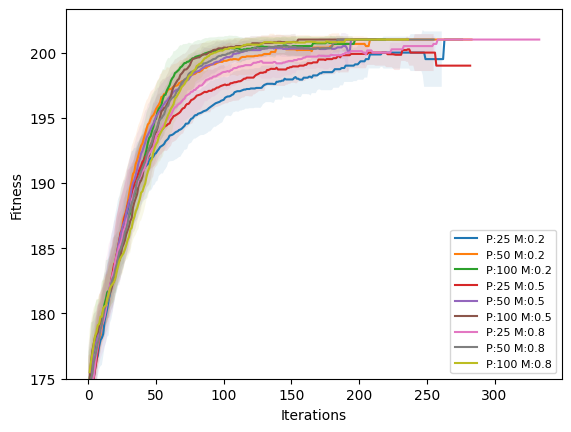

In [415]:
# average fitness performance for varying hyperparameters (multiple seeds)
attempt_size = [25]
pop_sizes = [25, 50, 100]
mut_size = [0.2, 0.5, 0.8]

# for a in attempt_size:
for m in mut_size:
    for p in  pop_sizes:
        df_group = df_curve_ga[(df_curve_ga['mutation_prob'] == m) & (df_curve_ga['pop_size'] == p) & (df_curve_ga['prob_size'] == 60)] 
        fit_mean = df_group.groupby('iterations').mean()['fitness']
        fit_std = df_group.groupby('iterations').std()['fitness']
        plt.plot(fit_mean, label='P:' + str(p) + ' M:'+str(m))
        plt.fill_between(np.arange(len(fit_mean)), fit_mean - fit_std, fit_mean + fit_std, alpha=0.1)
plt.legend(fontsize=8)
plt.xlabel('Iterations')
plt.ylabel('Fitness')
# if prob_type == 'four':
plt.ylim(bottom=175)

Text(0, 0.5, 'Fitness')

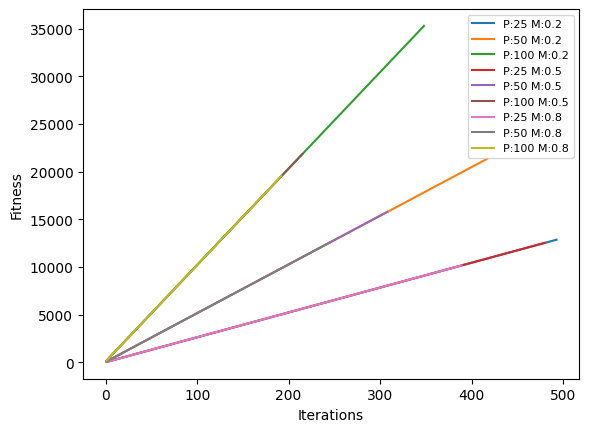

In [381]:
# average fitness performance for varying hyperparameters (multiple seeds)
attempt_size = [25]
pop_sizes = [25, 50, 100]
mut_size = [0.2, 0.5, 0.8]

# for a in attempt_size:
for m in mut_size:
    for p in  pop_sizes:
        df_group = df_curve_ga[(df_curve_ga['mutation_prob'] == m) & (df_curve_ga['pop_size'] == p) & (df_curve_ga['prob_size'] == 60)] 
        fit_mean = df_group.groupby('iterations').mean()['fevals']
        fit_std = df_group.groupby('iterations').std()['fevals']
        plt.plot(fit_mean, label='P:' + str(p) + ' M:'+str(m))
        plt.fill_between(np.arange(len(fit_mean)), fit_mean - fit_std, fit_mean + fit_std, alpha=0.1)
plt.legend(fontsize=8)
plt.xlabel('Iterations')
plt.ylabel('Fitness')
# if prob_type == 'four':
# plt.ylim([65,80])

20 Itermean: 84.9074074074074 Iterstd: 26.45224104384025
40 Itermean: 125.93703703703704 Iterstd: 36.346884813767666
60 Itermean: 152.7925925925926 Iterstd: 46.939219374641134
80 Itermean: 176.87777777777777 Iterstd: 52.69861782805745
100 Itermean: 203.2 Iterstd: 62.38527841536786


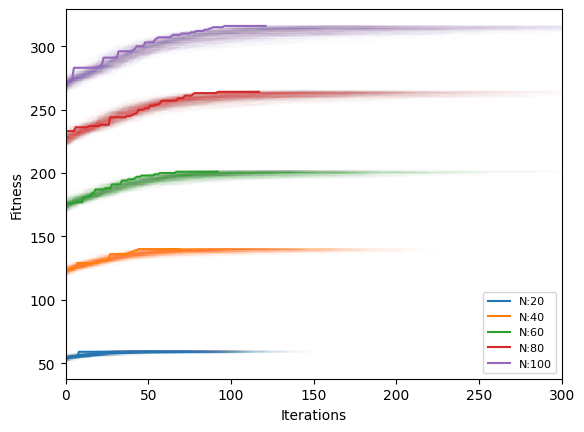

In [416]:
# problem size (with best) versus iterations
prob_size = [20, 40, 60, 80, 100]
idxs = []
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
for ii , i in enumerate(prob_size):
    df_sub = df_curve_ga[(df_curve_ga['prob_size'] == i)]
    vals = df_sub['count'].unique()

    average_iter = []
    for jj, j in enumerate(vals):
        df_i = df_sub[(df_sub['prob_size'] == i) & (df_sub['count']==j)]
        vals_j = df_i['fitness'].values
        average_iter.append(len(vals_j))
        plt.plot(vals_j, color=colors[ii], alpha=0.01)
    print(i, 'Itermean:',np.array(average_iter).mean(), 'Iterstd:',np.array(average_iter).std())

for kk, i in enumerate(prob_size):
    df_subs = df_results_ga[(df_results_ga['prob_size'] == i)]
    df_max = df_subs[(df_subs['best_fitness'] == df_subs['best_fitness'].max())]
    idx = df_max['stopped_at'].idxmin()
    vals_i = df_curve_ga[df_curve_ga['count'] == df_max.loc[idx]['count']]['fitness'].values
    plt.plot(vals_i, color=colors[kk], label='N:'+str(i))

plt.legend(fontsize=8)
plt.xlabel('Iterations')
plt.ylabel('Fitness')
if prob_type == 'four':
    plt.xlim([0,250])
if prob_type == 'color':
    plt.xlim([0,300])

20 Fmax: 37.0 Fmean: 36.55925925925926 Fstd: 2.454438045249833
20 Emax: 12328.0 Emean: 4370.837037037037 Estd: 2552.228104885807
20 Tmean 0.9842649588868004 Tstd: 0.6530600148037886
40 Fmax: 75.0 Fmean: 70.22222222222223 Fstd: 12.11437264951669
40 Emax: 21027.0 Emean: 7486.577777777778 Estd: 4076.601314942099
40 Tmean 1.4903113218513748 Tstd: 0.8789053573651912
60 Fmax: 113.0 Fmean: 95.96666666666667 Fstd: 27.9665607202337
60 Emax: 35274.0 Emean: 10745.744444444445 Estd: 6190.678175428634
60 Tmean 2.3632118696308075 Tstd: 1.526038554659964
80 Fmax: 151.0 Fmean: 102.62222222222222 Fstd: 50.27942170424775
80 Emax: 49725.0 Emean: 14195.455555555556 Estd: 9134.059734083332
80 Tmean 2.8993791785183864 Tstd: 1.9414770904831806
100 Fmax: 189.0 Fmean: 104.9888888888889 Fstd: 62.37903751251421
100 Emax: 74691.0 Emean: 18057.88888888889 Estd: 13584.721061309292
100 Tmean 2.8345262340720554 Tstd: 2.745894394712483


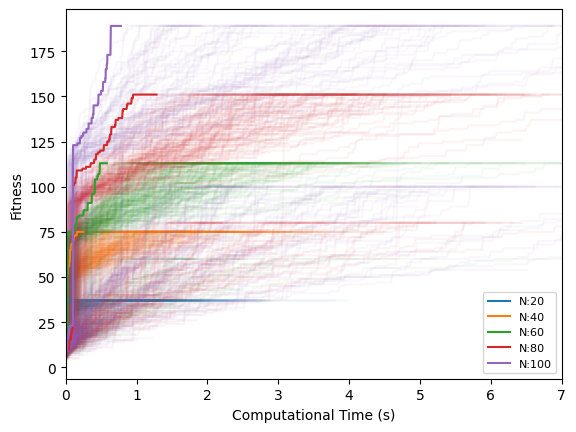

In [663]:
# problem size (with best) versus computational time
prob_size = [20, 40, 60, 80, 100]
idxs = []
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
for ii , i in enumerate(prob_size):
    df_sub = df_curve_ga[(df_curve_ga['prob_size'] == i)]
    vals = df_sub['count'].unique()

    average_times = []
    average_fitness = []
    average_fevals = []
    for jj, j in enumerate(vals):
        df_i = df_sub[(df_sub['prob_size'] == i) & (df_sub['count']==j)]
        time_j = df_i['run_time'].max()
        average_times.append(time_j)
        vals_j = df_i['fitness'].values
        fevals_j = df_i['fevals'].values
        average_fitness.append(vals_j.max())
        average_fevals.append(fevals_j.max())
        time_inc_j = np.linspace(0, time_j, len(vals_j))
        plt.plot(time_inc_j, vals_j, color=colors[ii], alpha=0.05)
    print(i,'Fmax:',np.array(average_fitness).max(), 'Fmean:',np.array(average_fitness).mean(), 'Fstd:',np.array(average_fitness).std())
    print(i,'Emax:',np.array(average_fevals).max(), 'Emean:',np.array(average_fevals).mean(), 'Estd:',np.array(average_fevals).std())
    print(i, 'Tmean',np.array(average_times).mean(),'Tstd:', np.array(average_times).std())


for kk, i in enumerate(prob_size):
    df_subs = df_results_ga[(df_results_ga['prob_size'] == i)]
    df_max = df_subs[(df_subs['best_fitness'] == df_subs['best_fitness'].max())]
    idx = df_max['run_time'].idxmin()
    time_i = df_max.loc[idx]['run_time']
    vals_i = df_curve_ga[df_curve_ga['count'] == df_max.loc[idx]['count']]['fitness'].values
    time_inc_i = np.linspace(0, time_i, len(vals_i))
    plt.plot(time_inc_i, vals_i, color=colors[kk], label='N:'+str(i))

plt.legend(fontsize=8)
plt.xlabel('Computational Time (s)')
plt.ylabel('Fitness')
if prob_type == 'four':
    plt.xlim([0, 7])
if prob_type == 'color':
    plt.xlim([0, 7])

20 Fmax: 37.0 Fmean: 36.55925925925926 Fstd: 2.454438045249833
20 Emax: 758271.0 Emean: 182300.83703703704 Estd: 138847.7411436692
20 Tmean 0.9842649588868004 Tstd: 0.6530600148037886
40 Fmax: 75.0 Fmean: 70.22222222222223 Fstd: 12.11437264951669
40 Emax: 2673338.0 Emean: 543442.411111111 Estd: 421834.9695073031
40 Tmean 1.4903113218513748 Tstd: 0.8789053573651912
60 Fmax: 113.0 Fmean: 95.96666666666667 Fstd: 27.9665607202337
60 Emax: 6174147.0 Emean: 1145558.774074074 Estd: 954783.7965605486
60 Tmean 2.3632118696308075 Tstd: 1.526038554659964
80 Fmax: 151.0 Fmean: 102.62222222222222 Fstd: 50.27942170424775
80 Emax: 12258947.0 Emean: 2037804.3074074073 Estd: 1893993.2431602455
80 Tmean 2.8993791785183864 Tstd: 1.9414770904831806
100 Fmax: 189.0 Fmean: 104.9888888888889 Fstd: 62.37903751251421
100 Emax: 32913241.0 Emean: 3615103.914814815 Estd: 4354747.207455655
100 Tmean 2.8345262340720554 Tstd: 2.745894394712483


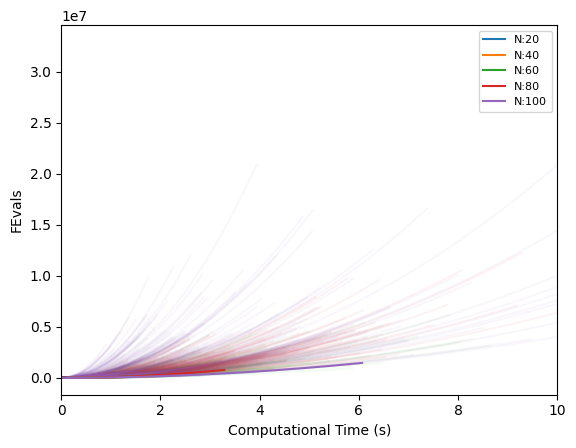

In [142]:
# problem size (with best) versus computational time
prob_size = [20, 40, 60, 80, 100]
idxs = []
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
for ii , i in enumerate(prob_size):
    df_sub = df_curve_ga[(df_curve_ga['prob_size'] == i)]
    vals = df_sub['count'].unique()

    average_times = []
    average_fitness = []
    average_fevals = []
    for jj, j in enumerate(vals):
        df_i = df_sub[(df_sub['prob_size'] == i) & (df_sub['count']==j)]
        time_j = df_i['run_time'].max()
        average_times.append(time_j)
        vals_j = df_i['fitness'].values
        fevals_j = df_i['fevals'].values
        average_fitness.append(vals_j.max())
        average_fevals.append(fevals_j.max())
        time_inc_j = np.linspace(0, time_j, len(vals_j))
        plt.plot(time_inc_j, fevals_j, color=colors[ii], alpha=0.05)
    print(i,'Fmax:',np.array(average_fitness).max(), 'Fmean:',np.array(average_fitness).mean(), 'Fstd:',np.array(average_fitness).std())
    print(i,'Emax:',np.array(average_fevals).max(), 'Emean:',np.array(average_fevals).mean(), 'Estd:',np.array(average_fevals).std())
    print(i, 'Tmean',np.array(average_times).mean(),'Tstd:', np.array(average_times).std())


for kk, i in enumerate(prob_size):
    df_subs = df_results_ga[(df_results_ga['prob_size'] == i)]
    df_max = df_subs[(df_subs['best_fitness'] == df_subs['best_fitness'].max())]
    idx = df_max['stopped_at'].idxmin()
    time_i = df_max.loc[idx]['run_time']
    vals_i = df_curve_ga[df_curve_ga['count'] == df_max.loc[idx]['count']]['fitness'].values
    fevals_i = df_curve_ga[df_curve_ga['count'] == df_max.loc[idx]['count']]['fevals_total'].values
    time_inc_i = np.linspace(0, time_i, len(vals_i))
    plt.plot(time_inc_i, fevals_i, color=colors[kk], label='N:'+str(i))

plt.legend(fontsize=8)
plt.xlabel('Computational Time (s)')
plt.ylabel('FEvals')
if prob_type == 'four':
    plt.xlim([0, 10])
if prob_type == 'color':
    plt.xlim([0, 5])

In [214]:
if not load_previous:
	if prob_type == 'color':
		experiment_name = "ColorsMap_SA"
	elif prob_type == 'four':
		experiment_name = "FourPeaks_SA"
	directory_root = './outputdir'
	print(prob_type, experiment_name)

	# prep dataset
	labels = ['problem', 'count', 'seed', 'prob_size', 'max_attempts', 'max_iters', 'temp', 'run_time', 'best_fitness', 'stopped_at']
	results_list = []
	curve_dfs = []
	curve_list = []

	decay = mlr.ExpDecay # GeoDecay, ExpDecay
	np.random.seed(100)
	seeds = np.random.randint(0, 1000, size=(10))
	n_size = [20, 40, 60, 80, 100]
	attempt_size = [25, 50, 75]
	temp_size = [10, 100, 1000, 10000] #10, 100, 1000, 10000
	iters = 50000 # np.inf
	count = 0
	total = len(seeds) * len(n_size) * len(attempt_size) * len(temp_size)

	for n in n_size:
		if prob_type == 'color':
			problem = ut.MaxKColorGenerator().generate(number_of_nodes=n, max_connections_per_node=6, max_colors=5, maximize=True)
		elif prob_type == 'four':
			problem = ut.FourPeaksGenerator().generate(size=n, t_pct=0.1)
			# Four Peaks Problem: with length of 40, there are two local maxima of 40, and two optima of 75
			# fitness = mlr.FourPeaks(t_pct=0.1)
			# problem = mlr.DiscreteOpt(length=n, fitness_fn=fitness, maximize=True, max_val=2)

		for seed in seeds:
			for attempts in attempt_size:
				for temp in temp_size:
					count += 1
					if count % 10 == 0:
						print(count,'/',total)

					start_time = time.perf_counter()
					best_state, best_fitness, curve = mlr.simulated_annealing(problem, schedule=decay(init_temp=temp), max_attempts=attempts, max_iters=iters, curve=True,)
					run_time = time.perf_counter() - start_time
					
					stopped_at = curve.shape[0]
					results_list.append((experiment_name, count, seed, n, attempts, iters, temp, run_time, best_fitness, stopped_at))
					df_curve = pd.DataFrame(curve, columns=['fitness','fevals'])
					df_curve['iterations'] = np.arange(1, len(curve)+1)
					df_curve['fevals_total'] = df_curve['fevals'].cumsum()
					df_curve[['count', 'seed', 'prob_size', 'max_attempts', 'max_iters', 'temp', 'run_time', 'best_fitness', 'stopped_at']] = count, seed, n, attempts, iters, temp, run_time, best_fitness, stopped_at
					curve_dfs.append(df_curve)
					curve_list.append(curve)
					problem.reset() 


	# compile & save results
	df_results_sa = pd.DataFrame(results_list, columns=labels)
	df_curve_sa = pd.concat(curve_dfs)
	ut.data_store([df_results_sa, df_curve_sa], experiment_name, directory_root)

	# minimal output
	print("# Best Run:")
	df_max = df_results_sa[(df_results_sa['best_fitness'] == df_results_sa['best_fitness'].max())]
	idx = df_max['stopped_at'].idxmin()
	print(df_results_sa.loc[idx])

color ColorsMap_SA
10 / 600
20 / 600
30 / 600
40 / 600
50 / 600
60 / 600
70 / 600
80 / 600
90 / 600
100 / 600
110 / 600
120 / 600
130 / 600
140 / 600
150 / 600
160 / 600
170 / 600
180 / 600
190 / 600
200 / 600
210 / 600
220 / 600
230 / 600
240 / 600
250 / 600
260 / 600
270 / 600
280 / 600
290 / 600
300 / 600
310 / 600
320 / 600
330 / 600
340 / 600
350 / 600
360 / 600
370 / 600
380 / 600
390 / 600
400 / 600
410 / 600
420 / 600
430 / 600
440 / 600
450 / 600
460 / 600
470 / 600
480 / 600
490 / 600
500 / 600
510 / 600
520 / 600
530 / 600
540 / 600
550 / 600
560 / 600
570 / 600
580 / 600
590 / 600
600 / 600
Saved files in ./outputdir\ColorsMap
# Best Run:
problem         ColorsMap_SA
count                    517
seed                     871
prob_size                100
max_attempts              25
max_iters              50000
temp                      10
run_time            0.658504
best_fitness           350.0
stopped_at              2104
Name: 516, dtype: object


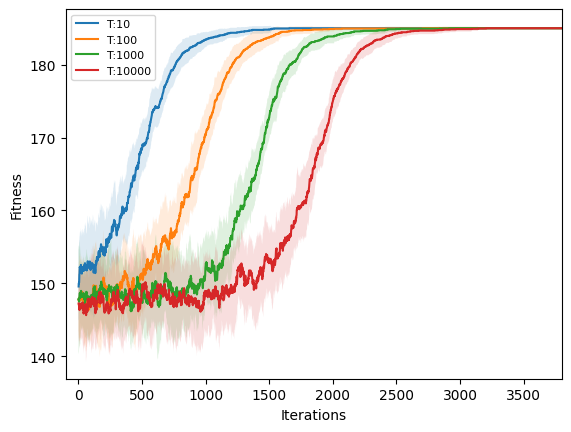

In [427]:
# average fitness performance for varying hyperparameters (multiple seeds)
attempt_size = [25, 50, 75]
temp_size = [10, 100, 1000, 10000]
for t in temp_size:
    df_group = df_curve_sa[(df_curve_sa['temp'] == t) & (df_curve_sa['prob_size'] == 60)] 
    fit_mean = df_group.groupby('iterations').mean()['fitness']
    fit_std = df_group.groupby('iterations').std()['fitness']
    plt.plot(fit_mean, label='T:'+str(t))
    plt.fill_between(np.arange(len(fit_mean)), fit_mean - fit_std, fit_mean + fit_std, alpha=0.15)
plt.legend(fontsize=8)
plt.xlabel('Iterations')
plt.ylabel('Fitness')
if prob_type == 'four':
    plt.xlim([-100,4600])
if prob_type == 'color':
    plt.xlim([-100,3800])

# plt.ylim(bottom=0)

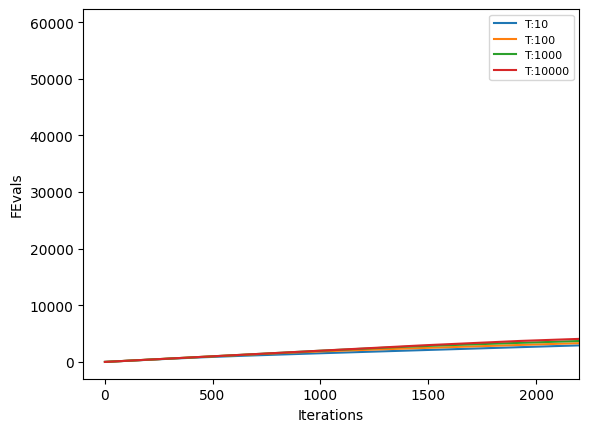

In [428]:
# average fitness performance for varying hyperparameters (multiple seeds)
attempt_size = [25, 50, 75]
temp_size = [10, 100, 1000, 10000]
for t in temp_size:
    df_group = df_curve_sa[(df_curve_sa['temp'] == t) & (df_curve_sa['prob_size'] == 100)] 
    fit_mean = df_group.groupby('iterations').mean()['fevals']
    fit_std = df_group.groupby('iterations').std()['fevals']
    plt.plot(fit_mean, label='T:'+str(t))
    plt.fill_between(np.arange(len(fit_mean)), fit_mean - fit_std, fit_mean + fit_std, alpha=0.15)
plt.legend(fontsize=8)
plt.xlabel('Iterations')
plt.ylabel('FEvals')
if prob_type == 'four':
    plt.xlim([-100,10000])
if prob_type == 'color':
    plt.xlim([-100,2200])

20 Itermean: 22138.866666666665 Iterstd: 20890.307624164423
40 Itermean: 11424.641666666666 Iterstd: 16134.131565202508
60 Itermean: 31994.75 Iterstd: 21646.277531887557
80 Itermean: 27622.508333333335 Iterstd: 21360.86743439813
100 Itermean: 24744.283333333333 Iterstd: 21896.710746206965


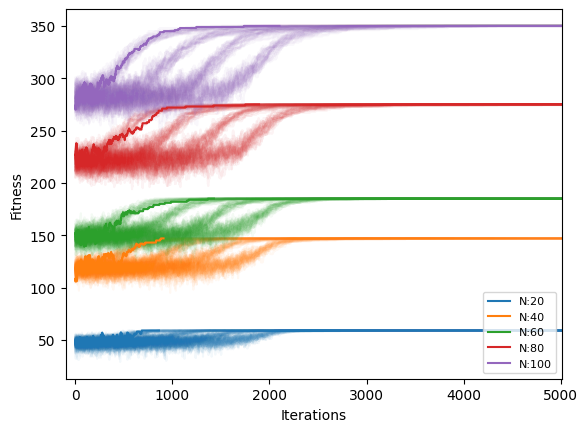

In [433]:
prob_size = [20, 40, 60, 80, 100]
idxs = []
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
for ii , i in enumerate(prob_size):
    df_sub = df_curve_sa[(df_curve_sa['prob_size'] == i)]
    vals = df_sub['count'].unique()

    average_iter = []
    for jj, j in enumerate(vals):
        df_i = df_sub[(df_sub['prob_size'] == i) & (df_sub['count']==j)]
        vals_j = df_i['fitness'].values
        average_iter.append(len(vals_j))
        plt.plot(vals_j, color=colors[ii], alpha=0.05)
    print(i, 'Itermean:',np.array(average_iter).mean(), 'Iterstd:',np.array(average_iter).std())

for kk, i in enumerate(prob_size):
    df_subs = df_results_sa[(df_results_sa['prob_size'] == i)]
    df_max = df_subs[(df_subs['best_fitness'] == df_subs['best_fitness'].max())]
    idx = df_max['stopped_at'].idxmin()
    vals_i = df_curve_sa[df_curve_sa['count'] == df_max.loc[idx]['count']]['fitness'].values
    plt.plot(vals_i, color=colors[kk], label='N:'+str(i))
plt.legend(fontsize=8, loc='lower right')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
if prob_type == 'four':
    plt.xlim([-100, 5500])
if prob_type == 'color':
    plt.xlim([-100, 5010])
    # plt.ylim([50,80])

20 Fmax: 37.0 Fmean: 36.81666666666667 Fstd: 0.591373166640339
20 Emax: 3971.0 Emean: 2354.133333333333 Estd: 1035.255306138968
20 Tmean 0.12346813417146525 Tstd: 0.0776437579748061
40 Fmax: 75.0 Fmean: 69.60833333333333 Fstd: 11.859803141517803
40 Emax: 4884.0 Emean: 3139.766666666667 Estd: 1044.8668235181403
40 Tmean 0.14594514333487799 Tstd: 0.07878585452102016
60 Fmax: 113.0 Fmean: 89.78333333333333 Fstd: 26.469851823452952
60 Emax: 7614.0 Emean: 4491.25 Estd: 1269.3325690430122
60 Tmean 0.2266685666652241 Tstd: 0.1077781922138041
80 Fmax: 151.0 Fmean: 102.88333333333334 Fstd: 34.48047354018728
80 Emax: 8811.0 Emean: 6362.966666666666 Estd: 1278.5946708094095
80 Tmean 0.31307240666938013 Tstd: 0.11341221172228319
100 Fmax: 189.0 Fmean: 109.21666666666667 Fstd: 33.43829723867862
100 Emax: 12846.0 Emean: 9211.475 Estd: 1550.9129567370956
100 Tmean 0.49646646166753877 Tstd: 0.167011489368655


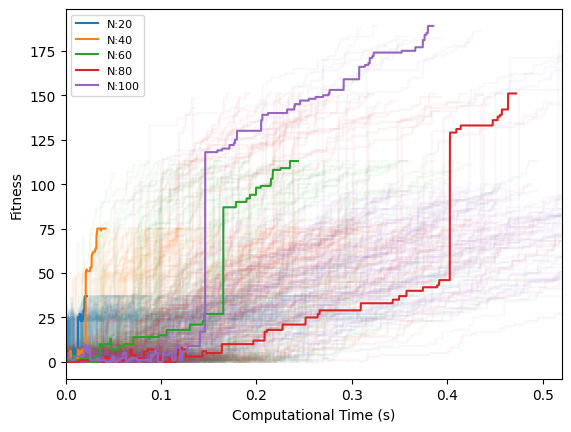

In [664]:
# problem size (with best) versus computational time
prob_size = [20, 40, 60, 80, 100]
idxs = []
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
for ii , i in enumerate(prob_size):
    df_sub = df_curve_sa[(df_curve_sa['prob_size'] == i)]
    vals = df_sub['count'].unique()
    
    average_times = []
    average_fitness = []
    average_fevals = []
    for jj, j in enumerate(vals):
        df_i = df_sub[(df_sub['prob_size'] == i) & (df_sub['count']==j)]
        time_j = df_i['run_time'].max()
        average_times.append(time_j)
        vals_j = df_i['fitness'].values
        fevals_j = df_i['fevals'].values
        average_fitness.append(vals_j.max())
        average_fevals.append(fevals_j.max())
        time_inc_j = np.linspace(0, time_j, len(vals_j))
        plt.plot(time_inc_j, vals_j, color=colors[ii], alpha=0.05)
    print(i,'Fmax:',np.array(average_fitness).max(), 'Fmean:',np.array(average_fitness).mean(), 'Fstd:',np.array(average_fitness).std())
    print(i,'Emax:',np.array(average_fevals).max(), 'Emean:',np.array(average_fevals).mean(), 'Estd:',np.array(average_fevals).std())
    print(i, 'Tmean',np.array(average_times).mean(),'Tstd:', np.array(average_times).std())

for kk, i in enumerate(prob_size):
    df_subs = df_results_sa[(df_results_sa['prob_size'] == i)]
    df_max = df_subs[(df_subs['best_fitness'] == df_subs['best_fitness'].max())]
    idx = df_max['stopped_at'].idxmin()
    time_i = df_max.loc[idx]['run_time']
    vals_i = df_curve_sa[df_curve_sa['count'] == df_max.loc[idx]['count']]['fitness'].values
    fevals_i = df_curve_sa[df_curve_sa['count'] == df_max.loc[idx]['count']]['fevals_total'].values
    time_inc_i = np.linspace(0, time_i, len(vals_i))
    plt.plot(time_inc_i, vals_i, color=colors[kk], label='N:'+str(i))

plt.legend(fontsize=8)
plt.xlabel('Computational Time (s)')
plt.ylabel('Fitness')
if prob_type == 'four':
    plt.xlim([0, 0.52])
if prob_type == 'color':
    plt.xlim([0, 15])

20 Fmax: 37.0 Fmean: 36.81666666666667 Fstd: 0.591373166640339
20 Emax: 4617204.0 Emean: 1931873.825 Estd: 1372578.5075983854
20 Tmean 0.12346813417146525 Tstd: 0.0776437579748061
40 Fmax: 75.0 Fmean: 69.60833333333333 Fstd: 11.859803141517803
40 Emax: 7179983.0 Emean: 3312253.808333333 Estd: 1881865.031065212
40 Tmean 0.14594514333487799 Tstd: 0.07878585452102016
60 Fmax: 113.0 Fmean: 89.78333333333333 Fstd: 26.469851823452952
60 Emax: 18692517.0 Emean: 6950794.25 Estd: 3621252.9322871254
60 Tmean 0.2266685666652241 Tstd: 0.1077781922138041
80 Fmax: 151.0 Fmean: 102.88333333333334 Fstd: 34.48047354018728
80 Emax: 25284875.0 Emean: 14082240.466666667 Estd: 5157488.942036224
80 Tmean 0.31307240666938013 Tstd: 0.11341221172228319
100 Fmax: 189.0 Fmean: 109.21666666666667 Fstd: 33.43829723867862
100 Emax: 58267829.0 Emean: 29837664.608333334 Estd: 9908888.010606945
100 Tmean 0.49646646166753877 Tstd: 0.167011489368655


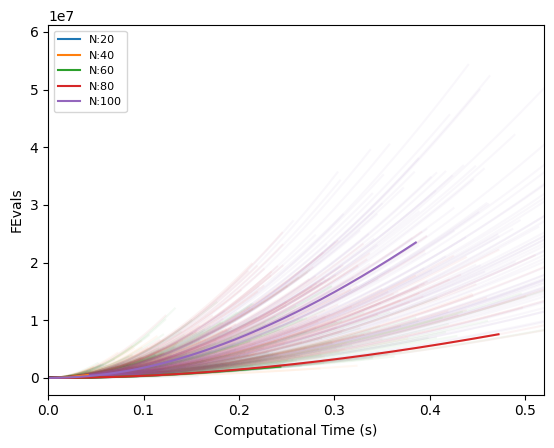

In [134]:
# problem size (with best) versus computational time
prob_size = [20, 40, 60, 80, 100]
idxs = []
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
for ii , i in enumerate(prob_size):
    df_sub = df_curve_sa[(df_curve_sa['prob_size'] == i)]
    vals = df_sub['count'].unique()
    
    average_times = []
    average_fitness = []
    average_fevals = []
    for jj, j in enumerate(vals):
        df_i = df_sub[(df_sub['prob_size'] == i) & (df_sub['count']==j)]
        time_j = df_i['run_time'].max()
        average_times.append(time_j)
        vals_j = df_i['fitness'].values
        fevals_j = df_i['fevals'].values
        average_fitness.append(vals_j.max())
        average_fevals.append(fevals_j.max())
        time_inc_j = np.linspace(0, time_j, len(vals_j))
        plt.plot(time_inc_j, fevals_j, color=colors[ii], alpha=0.05)
    print(i,'Fmax:',np.array(average_fitness).max(), 'Fmean:',np.array(average_fitness).mean(), 'Fstd:',np.array(average_fitness).std())
    print(i,'Emax:',np.array(average_fevals).max(), 'Emean:',np.array(average_fevals).mean(), 'Estd:',np.array(average_fevals).std())
    print(i, 'Tmean',np.array(average_times).mean(),'Tstd:', np.array(average_times).std())

for kk, i in enumerate(prob_size):
    df_subs = df_results_sa[(df_results_sa['prob_size'] == i)]
    df_max = df_subs[(df_subs['best_fitness'] == df_subs['best_fitness'].max())]
    idx = df_max['stopped_at'].idxmin()
    time_i = df_max.loc[idx]['run_time']
    vals_i = df_curve_sa[df_curve_sa['count'] == df_max.loc[idx]['count']]['fitness'].values
    fevals_i = df_curve_sa[df_curve_sa['count'] == df_max.loc[idx]['count']]['fevals_total'].values
    time_inc_i = np.linspace(0, time_i, len(vals_i))
    plt.plot(time_inc_i, fevals_i, color=colors[kk], label='N:'+str(i))

plt.legend(fontsize=8)
plt.xlabel('Computational Time (s)')
plt.ylabel('FEvals')
if prob_type == 'four':
    plt.xlim([0, 0.52])
if prob_type == 'color':
    plt.xlim([0, 2])

In [396]:
# prob_type = 'fourpeak'
# labels = ['RHC', 'SA', 'GA']
# if prob_type == 'fourpeak':
#     fmax = [115, 189, 189]
#     favg = [13.08333, 109.21666, 104.9888]
#     fstd = [14.7826380, 33.43829723, 62.37903751251421]

#     emax = [4831533, 58267829, 32913241]
#     eavg = [347080.675, 29837664.60833, 3615103.914814815]
#     estd = [716148.4034848523, 9908888.010606945, 4354747.207455655] 

#     tavg = [0.04399918516476949, 0.49646646166753877, 2.8345262340720554]
#     tstd = [0.04607428135409075,  0.167011489368655, 2.745894394712483]

#     iavg = [131.35, 5708.275, 302.84814814814814]
#     istd = [108.96380515259796, 945.6976610109949, 195.25006543437112]

# else:
#     #kcolor
#     fmax = [326, 350, 316]
#     favg = [318.68333, 348.90833333333336 , 313.4148148148148 ]
#     fstd = [6.234291, 2.35936373249701, 2.5902529125341474]

#     emax = [27266287, 1523922817, 4905434]
#     eavg = [3385952.691666667, 652497801.35, 1217344.8814814815 ]
#     estd = [4785022.988875459, 693901414.8803453, 782395.1372964142] 

#     tavg = [3.7257590889930725 , 6.817244054998445 , 3.084518817407122]
#     tstd = [3.4820994059641017, 5.8820499220197275, 1.6332698664276553]

#     iavg = [409.03333333333336, 24744.283333333333 , 203.200]
#     istd = [154.61036690841775, 21896.710746206965, 62.38527841536786]



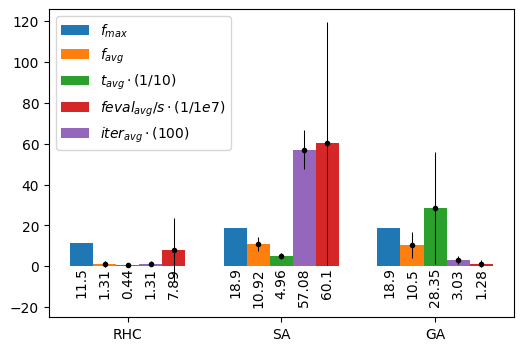

In [397]:
# X_axis = np.arange(len(labels)) 
# plt.figure(figsize=(6,4))
# plt.bar(X_axis - 0.30, np.array(fmax)/10, 0.15, label='$f_{max}$')
# plt.bar(X_axis - 0.15, np.array(favg)/10, 0.15, label='$f_{avg}$')
# plt.bar(X_axis, np.array(tavg)*10, 0.15, label='$t_{avg} \cdot (1/10)$')
# # plt.bar(X_axis+0.10, np.array(eavg)/1e6, 0.10, label='$feval_{avg} / 1e6$')
# plt.bar(X_axis + 0.30, (np.array(eavg)/1e6)/(np.array(tavg)), 0.15, label='$feval_{avg} / s \cdot (1/1e7)$')
# plt.bar(X_axis + 0.15, np.array(iavg)/100, 0.15, label='$iter_{avg}\cdot (100)$')

# epsilon = .03
# c1_test_std = plt.errorbar(X_axis - 0.15, np.array(favg)/10, yerr=np.array(fstd)/10, label=None, fmt='.k', elinewidth=0.75)
# c2_test_std = plt.errorbar(X_axis, np.array(tavg)*10, yerr=np.array(tstd)*10, label=None, fmt='.k', elinewidth=0.75)
# c3_test_std = plt.errorbar(X_axis + 0.30, (np.array(eavg)/1e6)/(np.array(tavg)), yerr=(np.array(estd)/1e6)/(np.array(tstd)), label=None, fmt='.k', elinewidth=0.75)
# c4_test_std = plt.errorbar(X_axis + 0.15, np.array(iavg)/100, yerr=np.array(istd)/100, label=None, fmt='.k', elinewidth=0.75)

# # Add annotations
# for i in range(len(labels)):
#     plt.text(i - 0.30, 0 , str(np.round(np.array(fmax)[i]/10,2)), ha='center', va='top', fontsize=10, rotation=90)
#     plt.text(i - 0.15,  - 0.5, str(np.round(np.array(favg)[i]/10,2)), ha='center', va='top', fontsize=10, rotation=90)
#     plt.text(i, - 0.5, str(np.round(np.array(tavg)[i]*10,2)), ha='center', va='top', fontsize=10, rotation=90)
#     plt.text(i + 0.30, - 0.5, str(np.round((np.array(eavg)[i]/1e6)/(np.array(tavg)[i]),2)), ha='center', va='top', fontsize=10, rotation=90)
#     plt.text(i + 0.15, - 0.5, str(np.round(np.array(iavg)[i]/100,2)), ha='center', va='top', fontsize=10, rotation=90)

# plt.xticks(X_axis, labels) 
# if prob_type == 'fourpeak':
#     plt.ylim(bottom=-25)
# else:
#     plt.ylim(bottom=-110)
# plt.legend(loc='upper left')
# plt.show() 

[-200. -100.    0.  100.  200.  300.  400.  500.]
[-500. -400. -300. -200. -100.    0.  100.  200.  300.]


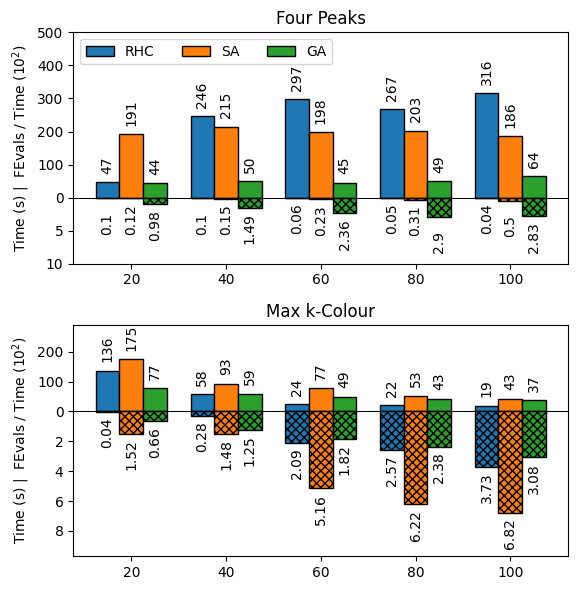

In [670]:
import matplotlib.pyplot as plt
import numpy as np

rand_opt_four = {'RHC': (46.63233106,	245.7724752,	296.8467637,	267.3680655,	316.3642776),
            'SA':  (190.6672802,	215.1333436,	198.1417215,	203.2426535,	185.5407306),
            'GA': (44.4071182,	50.2349923,	45.47093125,	48.96032799,	63.70690337)}

rand_opt_color = {'RHC': (135.9482125,	58.04381951,	23.770019,	22.42020868,	19.32008975),
            'SA': (174.9276167,	93.11234248,	76.52535484,	53.37903339,	43.23977269),
            'GA': (77.35010145,	58.54189528,	48.6112226,	42.59067884,	37.41925864)}

time_four = {'RHC': (0.099834142,	0.097106733,	0.060778916,	0.049125824,	0.043999185),
            'SA': (0.123468134,	0.145945143,	0.226668567,	0.313072407,	0.496466462),
            'GA': (0.984264959,	1.490311322,	2.36321187,	2.899379179,	2.834526234)}

time_color = {'RHC': (0.044326315,	0.278809472,	2.091503727,	2.566371445,	3.725759089),
            'SA': (1.521263985,	1.48240283,	5.157229708,	6.218744744,	6.817244055),
            'GA': (0.657921999,	1.253626421,	1.818910876,	2.379924325,	3.084518817)}


means = [rand_opt_four, rand_opt_color]
times = [time_four, time_color]
scale = [20, 50]

fig, axs = plt.subplots(2,1, figsize=(6, 6))
legend_handles = ['RHC', 'SA', 'GA']
problem_size = ("20", "40", "60", "80", "100")
for i in range(2):
        x = np.arange(len(problem_size))  # the label locations
        width = 0.25  # the width of the bars

        # fig, ax = plt.(layout='constrained')
        multiplier = 0
        for attribute, measurement in means[i].items():
            offset = width * multiplier
            # axs[i].errorbar(x + offset, np.round(measurement), yerr=stds[i][attribute], fmt=".", color="k", alpha=0.45)
            rects = axs[i].bar(x + offset, np.round(measurement), width, edgecolor='black', label=attribute)
            axs[i].bar_label(rects, padding=6, rotation=90)
            multiplier += 1

        multiplier = 0
        axs[i].set_prop_cycle(None)
        for attribute, measurement in times[i].items():
            
            offset = width * multiplier
            if i == 0:
                rects = axs[i].bar(x + offset, -scale[i] * np.round(measurement,2), width, edgecolor='black', hatch='xxxx')
            else:
                rects = axs[i].bar(x + offset, -scale[i] * np.round(measurement,2), width, edgecolor='black', hatch='xxxx')
            # axs[i].bar_label(rects, padding=3, rotation=90)
            multiplier += 1

            # Adding custom annotations
            annotations = ["First", "Second", "Third", "Fourth", "fifth"]
            for j, bar in enumerate(rects):
                height = -1* np.round(bar.get_height()/scale[i],2)
                axs[i].annotate(f'{height}',
                            xy=(bar.get_x() + bar.get_width() / 2, -1*height*scale[i] - 5),
                            xytext=(0, -25),  # 10 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom',
                            color='black',
                            rotation=90)

        # Add some text for labels, title and custom x-axis tick labels, etc.
        axs[i].axhline(0, color='k', linewidth=0.75)
        axs[i].set_ylabel('Time (s) |  FEvals / Time ($10^2$)', fontsize=10)
        axs[i].set_xticks(x + width, problem_size)
        if i == 0:
            axs[i].set_title('Four Peaks')
            axs[i].legend(loc='upper left', ncols=3)
            axs[i].set_ylim(-200, 500)
        else:
            axs[i].set_title('Max k-Colour')
            # axs[i].legend(loc='upper right', ncols=3)
            axs[i].set_ylim(-485, 290)
        plt.tight_layout()
        ticks =  axs[i].get_yticks()
        print(ticks)
        ticks[:abs(ticks).argmin()] = ticks[:abs(ticks).argmin()]/scale[i]
        axs[i].set_yticklabels([int(abs(tick)) for tick in ticks])

plt.show()
